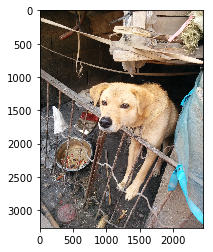

In [4]:

from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("test.jpg")
plt.imshow(img)
plt.show()

y = [1],it's a 'cat'pictrue.


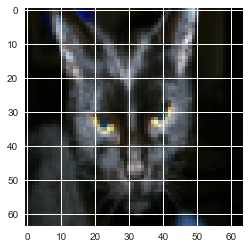

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)
train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [16]:
#训练神经网络识别猫

import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import  time
from lr_utils import load_dataset
from PIL import Image
from scipy import ndimage


import tensorflow as tf

"""
def load_dataset(): #载入训练数据函数
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
  
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
"""
#载入训练数据
train_set_x_orig,train_set_y,test_set_x_orig,test_set_y,classes = load_dataset()
index = 25
plt.imshow(train_set_x_orig[index])
print("y = " + str(train_set_y[:,index]) + ",it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") + "'pictrue.")
plt.show()
#time.sleep(0.5)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten = train_set_x_orig.reshape(m_train,-1).T #参数-1代表其余形状信息未知 自动改变数组形状
test_set_x_flatten = test_set_x_orig.reshape(m_test,-1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x = train_set_x_flatten/255.  #压缩数据
test_set_x = test_set_x_flatten/255. 

###----------------运行-----------------###

In [6]:
def sigmoid(x):
    s = 1.0/(1+np.exp(-x))
    return s

In [7]:
#初始化权值向量w

def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    return w,b

In [8]:
 #包含了正向传播和反向传播   是最核心的函数
def propagate(w,b,X,Y):  
    m = X.shape[1]
    #m是训练样本的数目
    A = sigmoid(np.dot(w.T,X)+b) #X是12288*299的矩阵，w是12288的行向量
    #A就是299的行向量
    assert(m!=0)
    
    cost = -(1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    
    dw = (1.0/m)*np.dot(X,(A-Y).T)
    db = (1.0/m)*np.sum(A-Y)
    assert(dw.shape==w.shape)
    assert(db.dtype==float)
    cost = np.squeeze(cost)   #np.squeeze()从数组的形状中删除单维条目，即把shape中为1的维度去掉
    assert(cost.shape == ())
 
    grads = {"dw":dw,
             "db":db}
    return grads,cost

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[ 0.99845601]
 [ 2.39507239]]
db = 0.00145557813678
cost = 5.80154531939


In [9]:
#用于优化参数的函数
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost = False):
    costs=[]
    for i in range(num_iterations):
        grads,cost = propagate(w,b,X,Y)
        
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate*dw
        b = b - learning_rate*db
        if i%100 == 0:
            costs.append(cost)
        
        if print_cost and i%100 == 0:
            print("Cost after iteration %i:%f" %(i, cost))
            print(cost)
    params = {"w":w,"b":b}
    grads = {"dw":dw,"db":db}
    return params,grads,costs
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[ 0.19033591]
 [ 0.12259159]]
b = 1.92535983008
dw = [[ 0.67752042]
 [ 1.41625495]]
db = 0.219194504541


In [10]:
#用于预测的函数
def predict(w,b,X):
    m = X.shape[1]  #m是样本数目
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    A = sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        # print("第"+str(i)+"个对象是猫的概率为"+str(A[0,i]))
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1
           
        else:
            Y_prediction[0,i] = 0
    
    assert(Y_prediction.shape == (1,m))
    return Y_prediction
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[ 1.  1.  0.]]


In [11]:
def model(X_train,Y_train,X_test,Y_test,num_iterations = 2000,learning_rate =0.5,print_cost = False,):
        ##！！！！！！！！！
        w,b = initialize_with_zeros(X_train.shape[0])   #w,b被初始化为0了？？？？why？？？
        parameters,grads,costs = optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
        w = parameters["w"]
        b = parameters["b"]
        Y_prediction_test = predict(w,b,X_test)
        Y_prediction_train = predict(w,b,X_train)
        print("train accyracy:{}%".format(100-np.mean(np.abs(Y_prediction_train - Y_train))*100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
        d={"cost":costs,
          "Y_prediction_test":Y_prediction_test,
          "Y_prediction_train":Y_prediction_train,
          "w":w,
          "b":b,
          "learning_rate":learning_rate,
          "num_iterations":num_iterations}
        return d

In [60]:
def train(X_train,Y_train,w,b,num_iterations = 2000,learning_rate = 0.5,print_cost = False):
    parameters,grads,costs = optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    w = parameters["w"]
    b = parameters["b"]
    
    d={"costs":costs,
          "w":w,
          "b":b,
          "learning_rate":learning_rate,
          "num_iterations":num_iterations}
    return d
def test(X_test,Y_test,w,b):
    Y_prediction = predict(w,b,X_test)
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction - Y_test)) * 100))
    return

d = model(train_set_x,train_set_y,test_set_x,test_set_y,2000,0.005,False)


train accyracy:99.04306220095694%
test accuracy: 70.0 %


In [71]:

for i in range(3):
    d = train(test_set_x,test_set_y,d["w"], d["b"],learning_rate = 0.009)
    d = train(train_set_x,train_set_y,d["w"], d["b"],learning_rate = 0.009)
    
test(test_set_x,test_set_y,d["w"],d["b"])

test accuracy: 100.0 %


(12288,)
[[ 0.]]


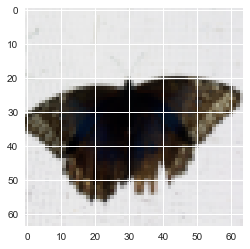

In [44]:
ok = 13
print(test_set_x.T[1].shape)
op = test_set_x.T[ok].reshape(12288,1)

l = predict(d["w"],d["b"],op)

print(l)
plt.imshow(test_set_x_orig[ok])
plt.show()

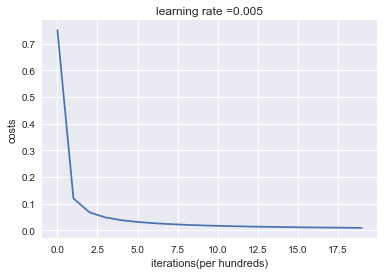

In [13]:
import seaborn as sns
sns.set(context='notebook')

costs = np.squeeze(d["costs"])
plt.plot(costs)
plt.ylabel("costs")
plt.xlabel('iterations(per hundreds)')
plt.title("learning rate ="+str(d['learning_rate']))
plt.show()

y=0.0,your algorithm predicts a "b'non-cat'"picture


C:\Users\jkand\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


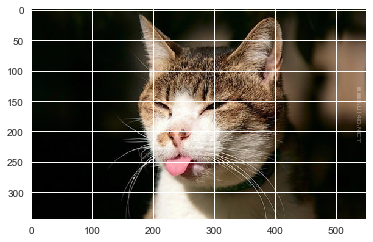

In [75]:
my_image = "cat4.jpg"
fname = "images/" + my_image
#image = mpimg.imread(fname)my
image = np.array(ndimage.imread(fname,flatten=False))

my_image = scipy.misc.imresize(image,size=(num_px,num_px))#缩小图片尺寸
my_image = my_image.reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"],d["b"],my_image)
plt.imshow(image)
print("y="+str(np.squeeze(my_predicted_image))+",your algorithm predicts a \""+str(classes[int(np.squeeze(my_predicted_image))])+"\"picture")
plt.show()

In [ ]:
testimg = Image.open("test.jpg")